# Why is EDA important?

كتاب الملاحظات هذا يقصد به تثقيف علماء البيانات المبتدئين عن أهمية التحليل الاستكشافي للبيانات

نوضح من خلال هذا الكتاب كيف أن المقاييس الإحصائية تخفق في وصف أربع مجموعات من البيانات

البيانات المستخدمة تم تقديمها في الورقة البحثية المذكورة أدناه يمكنك البحث عنها للإطلاع

This Notebook is intended to educate begginer data scientists about the importance of EDA.

We illustrate how statistical measures fail in describing 4 different datasets.

The datasets are introduced in the paper below for your refrence.


Reference: Anscombe, F. (1973), Graphs in Statistical Analysis, The American Statistician, pp. 195-199.

In [6]:
import pandas as pd # to create and handle Data Frame manipulation
import seaborn as sns # to get the dataset and create nice visualizations
import matplotlib.pyplot as plt # to adjust the plots for visualization
from scipy.stats import linregress # to perform linear regression
sns.set_style('dark') # set an appropriate theme

لنبدأ بتحميل مجموعة البيانات من مكتبة سيبورن ونستخرج الأربع مجموعات المختلفة


Let us start by loading the dataset from Seaborn and extracting the four different sets

In [2]:
anscombe = sns.load_dataset("anscombe")
dataset_1 = anscombe.loc[anscombe.dataset == "I"]
dataset_2 = anscombe.loc[anscombe.dataset == "II"]
dataset_3 = anscombe.loc[anscombe.dataset == "III"]
dataset_4 = anscombe.loc[anscombe.dataset == "IV"]

لنقوم بإجراء حسابات إحصائية على مجموعة البيانات لنرى كيف تختلف إحصائيا \ حسابيا

We will start performing some statistical computations on the dataset to see how they differ.

In [3]:
def compute_statistics(**data):
    df = pd.DataFrame(columns=['Dataset', 'N of Observations', 'Mean X', 'Mean Y', 
                               'Intercept', 'Slope', 'Error Std', 'Correlation'])
    
    for i, (dataset_name, dataset) in enumerate(data.items()):
        slope, intercept, correlation, p_value, std_error = linregress(dataset['x'], dataset['y'])
        df.loc[i] = [dataset_name, len(dataset), 
                     dataset['x'].mean().round(2), dataset['y'].mean().round(2),
                     intercept.round(2), slope.round(2), 
                     std_error.round(2), correlation.round(2)
                    ]
        
    df = df.set_index('Dataset')
    return df
compute_statistics(**{"Dataset 1":dataset_1, "Dataset 2":dataset_2, 
                      "Dataset 3":dataset_3, "Dataset 4":dataset_4})

,N of Observations,Mean X,Mean Y,Intercept,Slope,Error Std,Correlation
Dataset,,,,,,,
Dataset 1,11,9.0,7.5,3.0,0.5,0.12,0.82
Dataset 2,11,9.0,7.5,3.0,0.5,0.12,0.82
Dataset 3,11,9.0,7.5,3.0,0.5,0.12,0.82
Dataset 4,11,9.0,7.5,3.0,0.5,0.12,0.82


نجد أن كل الحسابات التي أجريناها تعطي تقريبا نفس الأرقام. هل هذه البيانات فعلا متطابقة؟

We find that all the computations we have performed results in approximately the same numbers. Are they really the same?

لنقوم بتطبيق واحدة من مهارات التحليل الإستكشافي للبيانات, وهي تصوير التشتت بين متغيرين. حيث يكون المحور الأول مقياس للمتغير الأول والمحور الثاني مقياس للمتغير الثاني.

Let us apply on of the EDA skills, which is scatter plot of two variables. The first axis will be the refrence of the first variable 'x' and the second axis will the refrence for the second variable 'y'.

In [4]:
# هذه وظيفة مساعدة لتعديل مدى المحورين للمخطط البياني
# This is only a helper function to adjust the x and y axes of the plot.
def set_xlim_ylim(data):
    x_min = data['x'].min() - data['x'].min() * 0.1
    x_max = data['x'].max() + data['x'].max() * 0.1
    y_min = data['y'].min() - data['y'].min() * 0.1
    y_max = data['y'].max() + data['y'].max() * 0.1
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])

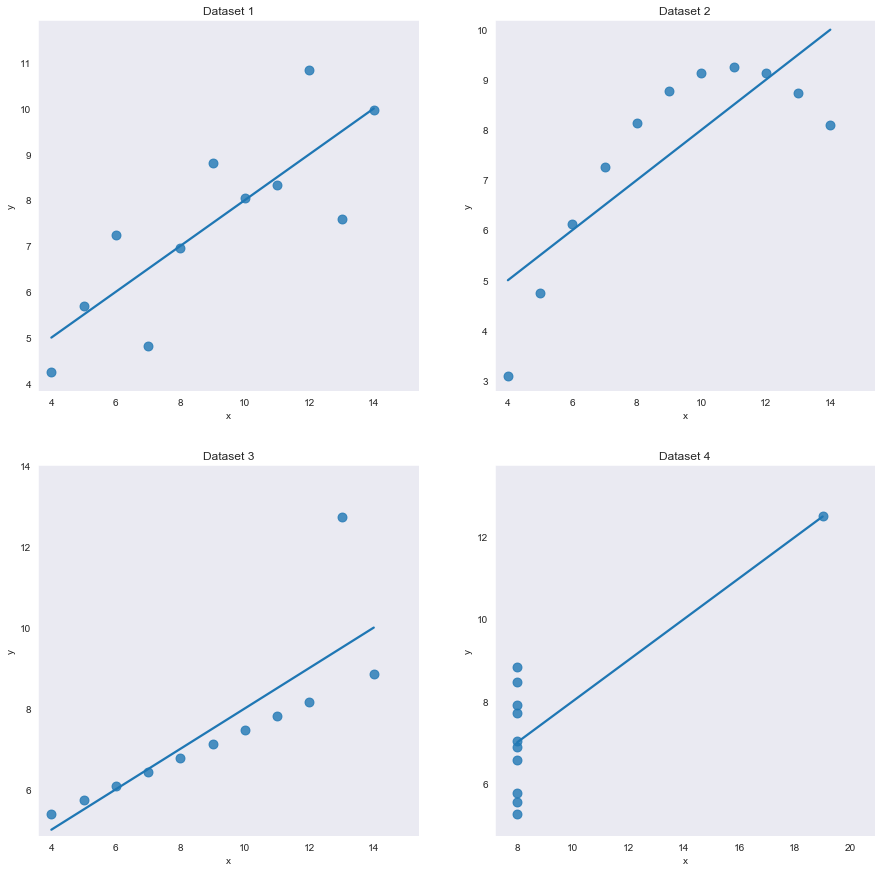

In [8]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
sns.regplot(data=dataset_1, x='x', y='y', scatter_kws={"s": 80}, order=1, ci=None, truncate=True)
plt.title("Dataset 1")
set_xlim_ylim(dataset_1)
plt.subplot(2, 2, 2)
sns.regplot(data=dataset_2, x='x', y='y', scatter_kws={"s": 80}, order=1, ci=None, truncate=True)
plt.title("Dataset 2")
set_xlim_ylim(dataset_2)
plt.subplot(2, 2, 3)
sns.regplot(data=dataset_3, x='x', y='y', scatter_kws={"s": 80}, order=1, ci=None, truncate=True)
plt.title("Dataset 3")
set_xlim_ylim(dataset_3)
plt.subplot(2, 2, 4)
sns.regplot(data=dataset_4, x='x', y='y', scatter_kws={"s": 80}, order=1, ci=None, truncate=True)
plt.title("Dataset 4")
set_xlim_ylim(dataset_4)

نستطيع ملاحظة الإختلاف بين مجموعات البيانات الأربع بشكل مرئي وواضح.

We can observe the difference between these datasets in a visual and clear way.


نصيحة: يجب أن لا نعتمد على الأرقام الناتجة عن الحسابات الإحصائية للبيانات فقط. فقد لا تستطيع إيصال كل المعلومات الموجودة في البيانات


Tip: we must not rely only on the numbers of statistical computations. It might not deliver all the information inside the data.